In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/crisd/Downloads/UNZIP_FOR_NOTEBOOKS_FINAL/DATA/mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
X = df.drop('class', axis=1)


In [5]:
X = pd.get_dummies(X, drop_first=True)

In [7]:
y = df['class']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [10]:
from sklearn.ensemble import GradientBoostingClassifier

In [11]:
from sklearn.model_selection import GridSearchCV

In [12]:
param_grid = {'n_estimators': [50, 100],
                'learning_rate': [0.1, 0.05, 0.2],
                'max_depth': [3,4,5]}

In [13]:
gb_model = GradientBoostingClassifier()

In [14]:
grid = GridSearchCV(gb_model, param_grid)

In [15]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [16]:
from sklearn.metrics import classification_report, accuracy_score, plot_confusion_matrix

In [17]:
preds = grid.predict(X_test)

In [18]:
grid.best_estimator_

GradientBoostingClassifier(n_estimators=50)

In [19]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

In [20]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       444
           p       1.00      1.00      1.00       369

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



In [21]:
grid.best_estimator_.feature_importances_

array([1.71990251e-04, 6.78787213e-16, 8.47751924e-18, 0.00000000e+00,
       0.00000000e+00, 1.68661908e-03, 3.48772574e-16, 1.54037396e-16,
       0.00000000e+00, 4.69508414e-17, 1.46067052e-16, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.27279528e-18,
       2.38983263e-03, 5.75277037e-02, 1.30525988e-04, 1.07273460e-02,
       2.07370954e-02, 1.01668425e-03, 6.15607813e-01, 6.24984488e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.23770743e-02,
       1.12089836e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.22198182e-17,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       7.49009504e-04, 3.72420500e-04, 1.28900686e-01, 3.03211335e-03,
       2.54841808e-02, 2.95999592e-04, 8.16861306e-04, 0.00000000e+00,
       0.00000000e+00, 2.38525408e-03, 4.19635419e-02, 3.36410072e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [22]:
feat_import = grid.best_estimator_.feature_importances_

In [23]:
imp_feat = pd.DataFrame(index=X.columns, data=feat_import, columns=['Importance'])

In [25]:
imp_feat = imp_feat[imp_feat['Importance'] > 0.0005]

In [26]:
imp_feat

,Importance
cap-surface_g,0.001687
cap-color_y,0.002390
bruises_t,0.057528
odor_f,0.010727
odor_l,0.020737
odor_m,0.001017
odor_n,0.615608
odor_p,0.006250
gill-spacing_w,0.012377
gill-size_n,0.011209


In [28]:
imp_feat = imp_feat.sort_values('Importance')

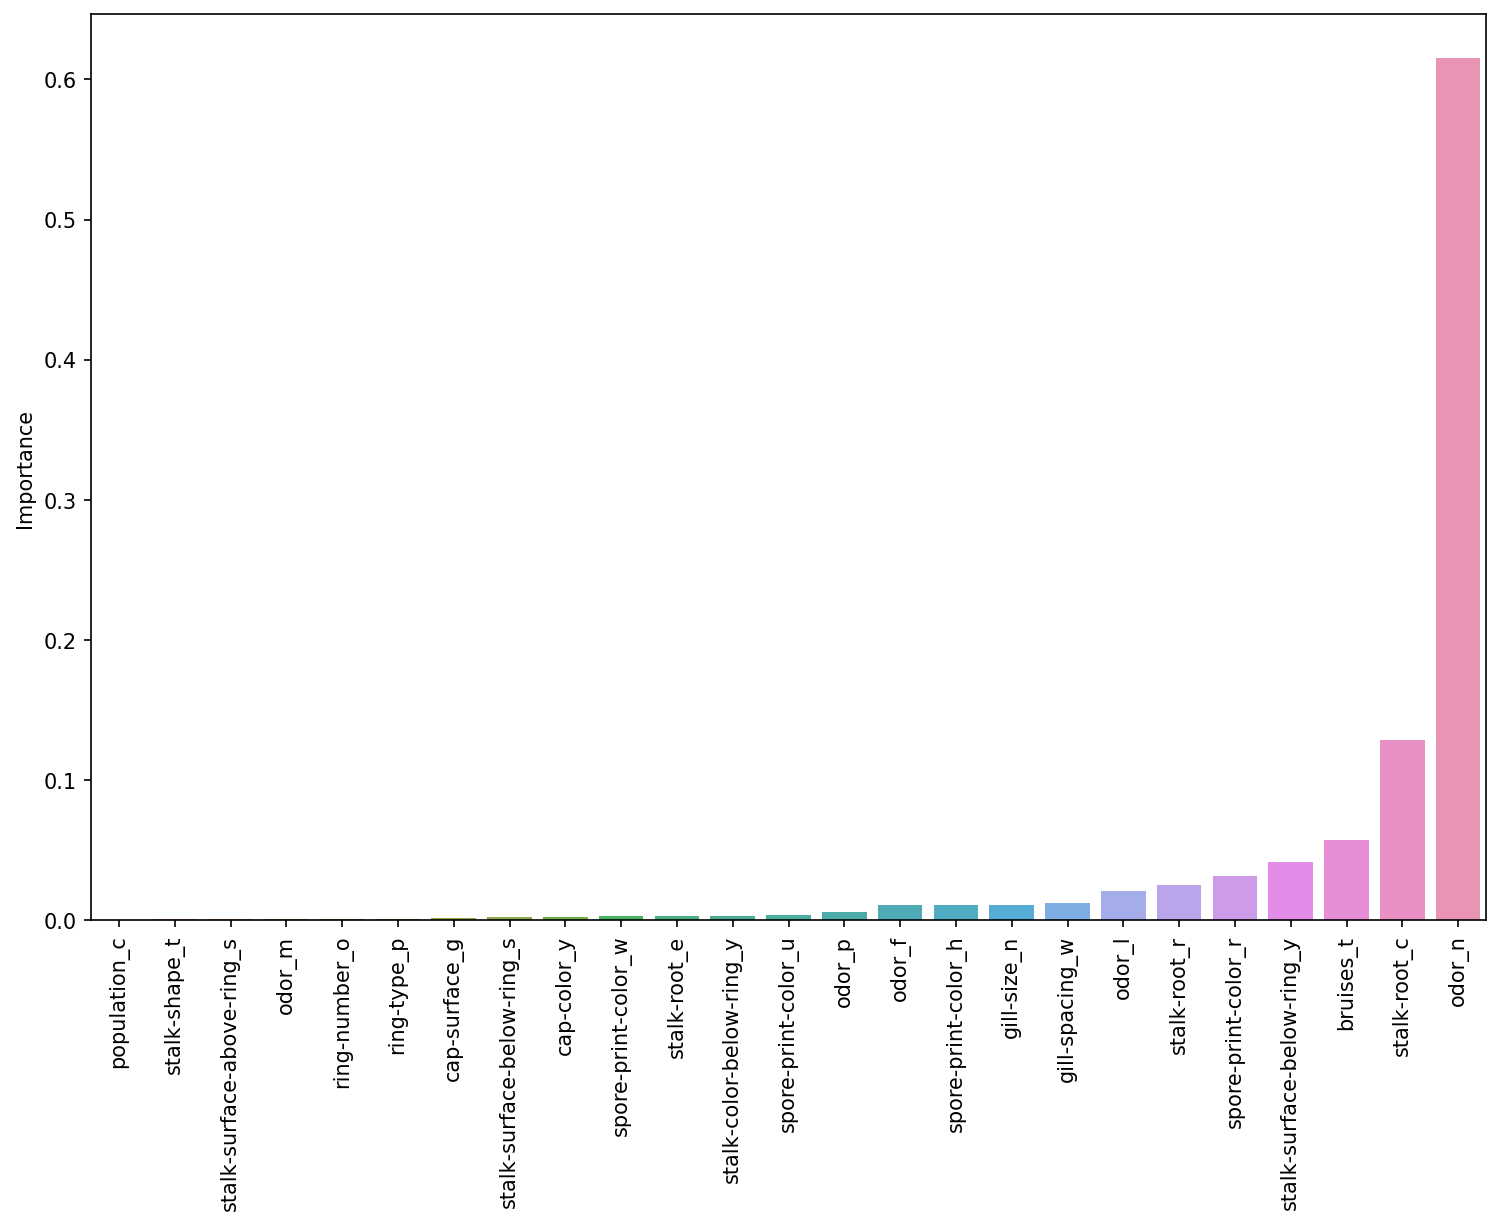

In [32]:

plt.figure(figsize=(12,8), dpi=150)
sns.barplot(data=imp_feat, x=imp_feat.index, y='Importance')
plt.xticks(rotation=90);